<a href="https://colab.research.google.com/github/Anujpratap9997/DeepLearning/blob/main/Dog_and_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:10<00:00, 35.1MB/s]
100% 1.06G/1.06G [00:10<00:00, 114MB/s] 


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:

train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Normalize
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [10]:
# create CNN Model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.BinaryAccuracy()])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 106ms/step - loss: 1.2184 - binary_accuracy: 0.5749 - val_loss: 0.6640 - val_binary_accuracy: 0.6016
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6386 - binary_accuracy: 0.6289 - val_loss: 0.6208 - val_binary_accuracy: 0.6764
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5666 - binary_accuracy: 0.6980 - val_loss: 0.5162 - val_binary_accuracy: 0.7540
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4740 - binary_accuracy: 0.7517 - val_loss: 0.5212 - val_binary_accuracy: 0.7592
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4271 - binary_accuracy: 0.7768 - val_loss: 0.5205 - val_binary_accuracy: 0.7454
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3766 - binary_accuracy: 0.8108 - val_loss: 0.4589 - val_binary_accuracy: 0.7990
Epoch 7/10
625/625 [==========================

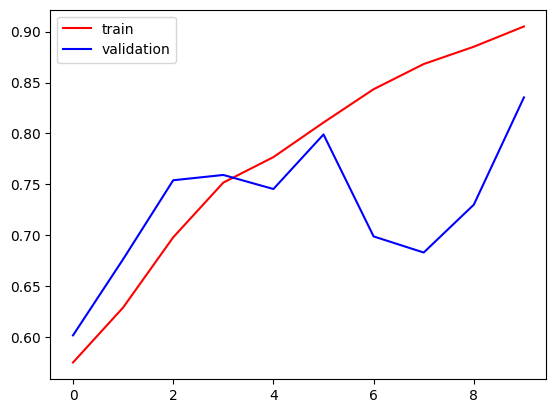

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['binary_accuracy'],color='red',label='train')
plt.plot(history.history['val_binary_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

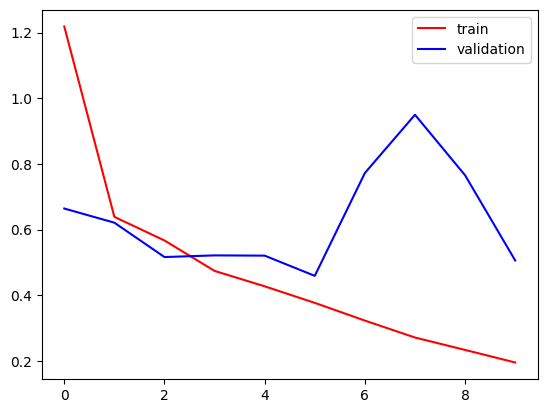

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history["val_loss"],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
evaluation = model.evaluate(validation_ds)
accuracy = evaluation[1]
print(f"Accuracy: {accuracy * 100:.2f}%")

157/157 [==============================] - 9s 56ms/step - loss: 0.5059 - binary_accuracy: 0.8354
Accuracy: 83.54%


In [21]:
animal_dict={'0':'Cat','1':'Dog'}

In [23]:
import cv2

In [35]:
file_path='/content/Cat.jpg'

In [36]:
test_img1=cv2.imread(file_path)

(-0.5, 542.5, 359.5, -0.5)

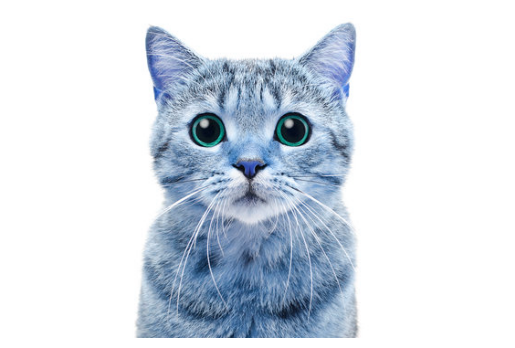

In [37]:
plt.imshow(test_img1)
plt.axis('off')

In [27]:
test_img1.shape

(360, 543, 3)

In [28]:
#Need to reshape the img to 256*256
test_img1=cv2.resize(test_img1,(256,256))


In [29]:
test_input1=test_img1.reshape((1,256,256,3))

In [30]:
predict=model.predict(test_input1)

1/1 [==============================] - 1s 741ms/step


In [34]:
predicted_class = str(int(predict[0][0]))
animal_name = animal_dict.get(predicted_class, 'Unknown')
print(animal_name)

Cat
